In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sympy as sp


![zad1.png](images/note1/zad1.png)

**Characteristic Function for Gaussian Distribution**

\begin{align*}
\phi_X(t) &= \mathbb{E}[e^{itX}] \\
&= \int_{-\infty}^{\infty} e^{itx} \cdot \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx \\
&= e^{i\mu t - \frac{\sigma^2t^2}{2}}
\end{align*}

**Stability Law for n Independent Gaussian Variables:**

Let $X_1, \ldots, X_n$ be independent Gaussian variables where:
\begin{align*}
X_i &\sim \mathcal{N}(\mu_i, \sigma_i^2) \text{ for } i = 1,\ldots,n
\end{align*}

Their characteristic functions:
\begin{align*}
\phi_{X_1}(t) &= e^{i\mu_1t - \frac{\sigma_1^2t^2}{2}} \\
&\vdots \\
\phi_{X_n}(t) &= e^{i\mu_nt - \frac{\sigma_n^2t^2}{2}}
\end{align*}

For their sum (using independence property):
\begin{align*}
\phi_{X_1 + \cdots + X_n}(t) &= \phi_{X_1}(t) \cdot \ldots \cdot \phi_{X_n}(t) \\
&= e^{i\mu_1t - \frac{\sigma_1^2t^2}{2}} \cdot \ldots \cdot e^{i\mu_nt - \frac{\sigma_n^2t^2}{2}} \\
&= e^{i(\mu_1 + \cdots + \mu_n)t - \frac{(\sigma_1^2 + \cdots + \sigma_n^2)t^2}{2}}
\end{align*}

Therefore:
\begin{align*}
X_1 + \cdots + X_n \sim \mathcal{N}\left(\sum_{i=1}^n \mu_i, \sum_{i=1}^n \sigma_i^2\right)
\end{align*}

![zad2.png](images/note1/zad2.png)


Characteristic function for Cauchy distribution:
φ(t) = E[e^(itX)] = ∫_{-∞}^{∞} e^(itx) * [1/(π(1+x²))] dx

We are using now Residue theory and we consider a contour in the complex plane so we are getting:

 - for t > 0: Res(e^(itz)/(π(1+z²)), i) = [e^(itz)/(2πi)]_{z=i} = e^(-t)/(2πi) * 2πi = e^(-t)
 - for t < 0: Res(e^(itz)/(π(1+z²)), -i) = [e^(itz)/(2πi)]_{z=-i} = e^(t)/(2πi) * 2πi = e^(t)

Verifying stability law:
For two independent Cauchy random variables X₁ and X₂ with the same parameters:
- The characteristic function of X₁ is φ₁(t) = e^(-|t|)
- The characteristic function of X₂ is φ₂(t) = e^(-|t|)
- The characteristic function of their sum X₁+X₂ is:
   φ₁₊₂(t) = φ₁(t) · φ₂(t) = e^(-|t|) · e^(-|t|) = e^(-2|t|)

This equals the characteristic function of a Cauchy random variable
with scale parameter 2, which is e^(-2|t|)



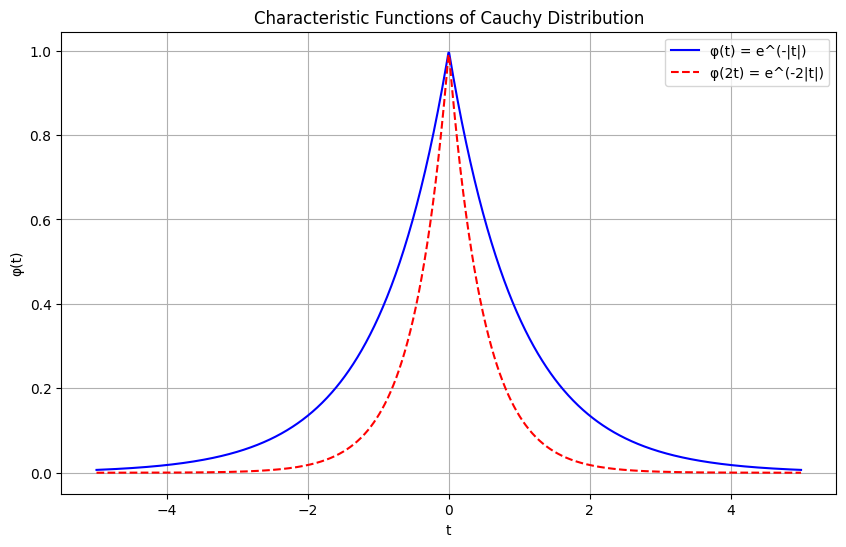

In [13]:
print("\nCharacteristic function for Cauchy distribution:")
print("φ(t) = E[e^(itX)] = ∫_{-∞}^{∞} e^(itx) * [1/(π(1+x²))] dx\n")
print("We are using now Residue theory and we consider a contour in the complex plane so we are getting:\n")
print(" - for t > 0: Res(e^(itz)/(π(1+z²)), i) = [e^(itz)/(2πi)]_{z=i} = e^(-t)/(2πi) * 2πi = e^(-t)")
print(" - for t < 0: Res(e^(itz)/(π(1+z²)), -i) = [e^(itz)/(2πi)]_{z=-i} = e^(t)/(2πi) * 2πi = e^(t)")
print("\nVerifying stability law:")
print("For two independent Cauchy random variables X₁ and X₂ with the same parameters:")
print("- The characteristic function of X₁ is φ₁(t) = e^(-|t|)")
print("- The characteristic function of X₂ is φ₂(t) = e^(-|t|)")
print("- The characteristic function of their sum X₁+X₂ is:")
print("   φ₁₊₂(t) = φ₁(t) · φ₂(t) = e^(-|t|) · e^(-|t|) = e^(-2|t|)")
print("\nThis equals the characteristic function of a Cauchy random variable")
print("with scale parameter 2, which is e^(-2|t|)\n")

def plot_cauchy_characteristic(t_range=None):
    if t_range is None:
        t_range = np.linspace(-5, 5, 1000)

    cf_single = np.exp(-np.abs(t_range))
    cf_sum = np.exp(-2 * np.abs(t_range))

    plt.figure(figsize=(10, 6))
    plt.plot(t_range, cf_single, label='φ(t) = e^(-|t|)', color='blue')
    plt.plot(t_range, cf_sum, label='φ(2t) = e^(-2|t|)', color='red', linestyle='--')

    plt.title('Characteristic Functions of Cauchy Distribution')
    plt.xlabel('t')
    plt.ylabel('φ(t)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_cauchy_characteristic()

![zad3.png](images/note1/zad3.png)

σ Range        Percentage
------------------------------
±01σ        68.2689492137085807144103455%
±02σ        95.4499736103641538420561119%
±03σ        99.7300203936739819710055599%
±04σ        99.9936657516333724515789072%
±05σ        99.9999426696856090757137281%
±06σ        99.9999998026824528096767608%
±07σ        99.9999999997440340848697815%
±08σ        99.9999999999998721023075632%
±09σ        100.0000000000000000000000000%
±10σ        100.0000000000000000000000000%


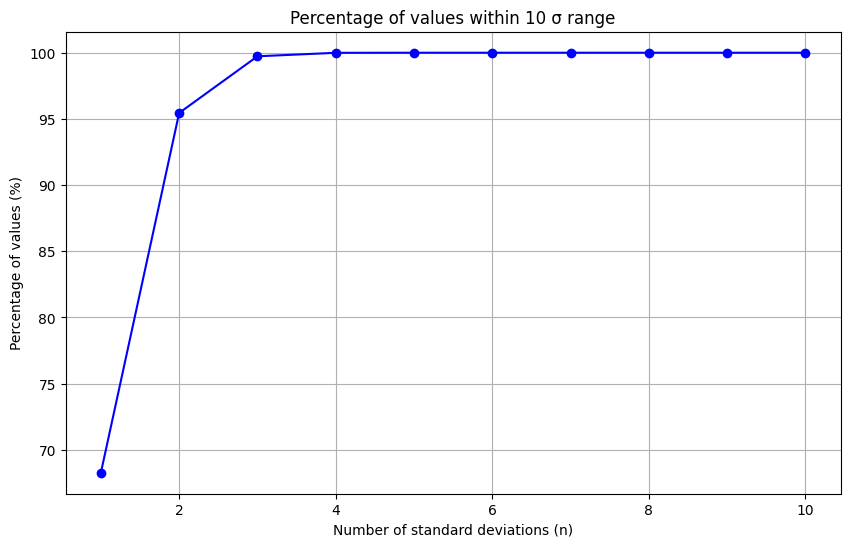

In [21]:
def gaussian_percentage_in_range(mu, sigma, n_sigmas):
    sigmas = np.arange(1, n_sigmas + 1)
    percentages = []

    for k in sigmas:
        # norm.cdf = gotowa funckja na odwrotnosc dystrybuanty, różnica: upper - lower daje prawdopodobieństwo znalezienia się wartości w przedziale dolnej i gornej granicy (ponizej i powyzej 1 sigma itp)
        lower = stats.norm.cdf(mu - k*sigma, mu, sigma)
        upper = stats.norm.cdf(mu + k*sigma, mu, sigma)
        percentage = (upper - lower) * 100
        percentages.append(percentage)

    return sigmas, percentages

sigmas, percentages = gaussian_percentage_in_range(0, 1, 10)

print("σ Range        Percentage")
print("-" * 30)
for k, p in zip(sigmas, percentages):
    print(f"±{str(k).zfill(2)}σ        {p:10.25f}%")

plt.figure(figsize=(10, 6))
plt.plot(sigmas, percentages, 'bo-')
plt.grid(True)
plt.title('Percentage of values within 10 σ range')
plt.xlabel('Number of standard deviations (n)')
plt.ylabel('Percentage of values (%)')
plt.show()

![zad4.png](images/note1/zad4.png)

In [1]:
from scipy.stats import norm

mu = 2
sigma = 0.3
p = 0.9

quantile = norm.ppf(p, loc=mu, scale=sigma)
print(f"\nQuantile for p={p} is {quantile}")

mu = 100
sigma = 6
p = 0.15

quantile = norm.ppf(p, loc=mu, scale=sigma)
print(f"Quantile for p={p} is {quantile}")


Quantile for p=0.9 is 2.3844654696633802
Quantile for p=0.15 is 93.78139966303726


![zad5.png](images/note1/zad5.png)

In [ ]:
import sympy as sp

x = sp.Symbol('x', real=True)
lambda_ = sp.Symbol('lambda', positive=True)

def kurtosis_exponential():
    f_exp = lambda_ * sp.exp(-lambda_ * x) # funkcja gestosci
    # (x, 0, sp.oo)) - całkowanie od 0 do +inf
    E_X_exp = sp.integrate(x * f_exp, (x, 0, sp.oo)) # Wartość oczekiwana E(X)
    E_X2_exp = sp.integrate(x**2 * f_exp, (x, 0, sp.oo)) # E(X^2)
    E_X4_exp = sp.integrate(x**4 * f_exp, (x, 0, sp.oo)) # E(X^4)

    Var_X_exp = E_X2_exp - E_X_exp**2 # Wariancja Var(X) = E(X^2) - (E(X))^2

    # Czwarty moment centralny C4 = E[(X - E(X))^4]
    C4_exp = E_X4_exp - 4 * E_X_exp * sp.integrate(x**3 * f_exp, (x, 0, sp.oo)) - 3 * E_X2_exp**2 + 12 * E_X_exp**2 * E_X2_exp - 6 * E_X_exp**4

    return C4_exp / Var_X_exp**2

def kurtosis_uniform(a, b):
    f_unif = 1 / (b - a)
    E_X_unif = sp.integrate(x * f_unif, (x, a, b))
    E_X2_unif = sp.integrate(x**2 * f_unif, (x, a, b))
    E_X4_unif = sp.integrate(x**4 * f_unif, (x, a, b))

    Var_X_unif = E_X2_unif - E_X_unif**2

    C4_unif = E_X4_unif - 4 * E_X_unif * sp.integrate(x**3 * f_unif, (x, a, b)) - 3 * E_X2_unif**2 + 12 * E_X_unif**2 * E_X2_unif- 6 * E_X_unif**4

    return C4_unif / Var_X_unif**2


kurt_exp = kurtosis_exponential()
kurt_uniform = kurtosis_uniform(-1/2, 1/2)

print("Kurtosis of Exponential Distribution:", kurt_exp)
print("Kurtosis of Uniform Distribution:", sp.nsimplify(kurt_uniform))

print("The exponential distribution has a high kurtosis which means indicating heavy tails.")
print("The uniform distribution has a low kurtosis which means lighter tails compared to a normal distribution.")

Kurtosis of Exponential Distribution: 6
Kurtosis of Uniform Distribution: -6/5
The exponential distribution has a high kurtosis which means indicating heavy tails.
The uniform distribution has a low kurtosis which means lighter tails compared to a normal distribution.


![zad6.png](images/note1/zad6.png)

In [ ]:
# Zadanie w pdfie (images/note1/solutions)

![zad7.png](images/note1/zad7.png)

In [ ]:
# Zadanie w pdfie (images/note1/solutions)

![zad8.png](images/note1/zad8.png)

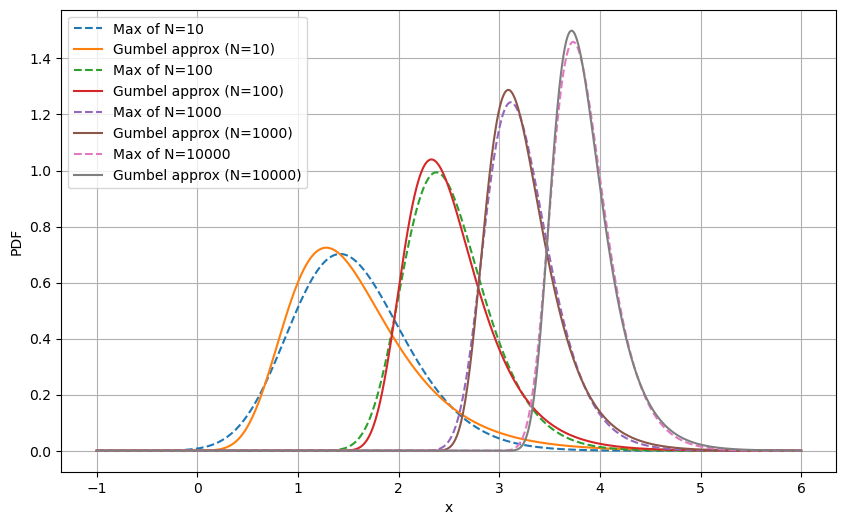

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gumbel_r

x = np.linspace(-1, 6, 1000)
Ns = [10, 100, 1000, 10000]

plt.figure(figsize=(10, 6))

for N in Ns:
    F = norm.cdf(x)
    F_max = F**N # dystrybuanta maksimum (CDF maksimum)
    
    f = norm.pdf(x)
    p_max = N * F**(N-1) * f # gęstość rozkładu maksimum - pochodna dystrybuanty (PDF maksimum)
    
    a_N = norm.ppf(1 - 1/N)
    b_N = norm.ppf(1 - 1/(N*np.e)) - a_N
    
    u = (x - a_N) / b_N # x = u * b_N + a_N => dx = b_N * du => p_u(u)du = p_x(x)dx => p_x(x) = p_u(u) / b_N
    p_gumbel = gumbel_r.pdf(u) / b_N  # gęstość rozkładu Gumbla po zmianie zmiennej
    
    plt.plot(x, p_max, '--', label=f'Max of N={N}')
    plt.plot(x, p_gumbel, label=f'Gumbel approx (N={N})')

plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid()
plt.show()
